In [70]:
#Adding all libraries 
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.metrics import recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
sns.set_style("whitegrid")
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier,VotingClassifier

In [71]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,roc_curve,auc,recall_score,precision_score
)
from sklearn.model_selection import cross_val_score

In [72]:
# Load the all the data from CSV files 
#train_data = pd.read_csv('train.csv')
# test_data = pd.read_csv('test.csv')
df_original = pd.read_csv('df_original.csv')
df_clean = pd.read_csv('df_clean.csv')
df = pd.read_csv('df_trim.csv')


In [73]:
#considering only 2021 data. 
df_2021 = df_clean[df_clean['Year'] == 2021]
df = df_2021

In [24]:
df.columns

Index(['AREA', 'Rpt Dist No', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Premis Cd', 'Crime_Category', 'Year', 'Date', 'Month', 'Hour',
       'Vict_Age1', 'Vict_Age2', 'Day', 'LatLon'],
      dtype='object')

In [25]:
df.Crime_Category.value_counts()

Crime_Category
0    30977
1    22089
3    12797
4     1417
2     1390
5      154
Name: count, dtype: int64

In [76]:
#Now that we have these catgories, we will encode them, 
category = {
    1: 1,
    2: 1,
    4: 1,
    0: 0,
    3 :0, 
    5 : 0 
}

# Similarly, applying the category to the same crime category column
df['Crime_Category'] = df['Crime_Category'].map(category)

# For Miscellaneous Crimes, we will define category to be 0
df['Crime_Category'].fillna(0, inplace=True)

#converting it into int as float might not work for some models 
df['Crime_Category'] = df['Crime_Category'].astype(int)


/var/folders/hz/ws3q5b8d38q_zyr3p29kkh0c0000gn/T/ipykernel_17150/661723001.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crime_Category'] = df['Crime_Category'].map(category)
/var/folders/hz/ws3q5b8d38q_zyr3p29kkh0c0000gn/T/ipykernel_17150/661723001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crime_Category'].fillna(0, inplace=True)
/var/folders/hz/ws3q5b8d38q_zyr3p29kkh0c0000gn/T/ipykernel_17150/661723001.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [77]:
df.Crime_Category.value_counts()

Crime_Category
0    43928
1    24896
Name: count, dtype: int64

In [28]:
df.head(5)
#We know the age is repeatative but the way it is calculated is different. 
# Vict age is the exact number, 
#vict_age1 is stated bins classifier and 
# vict_age2 is equal frequency classisifer

,AREA,Rpt Dist No,Vict Age,Vict Sex,Vict Descent,Premis Cd,Crime_Category,Year,Date,Month,Hour,Vict_Age1,Vict_Age2,Day,LatLon
234,7,722,31,0,3,203,0,2021,1,2,2,3,2,1,26852
1408,16,1675,32,0,3,101,0,2021,25,4,1,3,2,7,45042
2950,2,236,39,0,4,247,0,2021,7,2,5,3,3,7,24787
3841,11,1148,36,0,3,101,1,2021,25,1,1,3,3,1,31610
4709,1,124,54,0,2,702,0,2021,9,2,6,4,5,2,0


In [29]:
# Split the DataFrame into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=1)

# Save the subsets to separate CSV files
train_data.to_csv('train_2021.csv', index=False)
test_data.to_csv('test_2021.csv', index=False)


# Separate features and target variable for training data
x_train = train_data.drop(["Crime_Category"], axis=1)
y_train = train_data["Crime_Category"]

# Separate features and target variable for testing data
x_test = test_data.drop(["Crime_Category"], axis=1)
y_test = test_data["Crime_Category"]

In [30]:
#Faced issue earlier that there was discrepancy in the number of rows
#Hence, checking the shape of the datasets. 
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (48176, 14)
y_train (48176,)
x_test (20648, 14)
y_test (20648,)


In [31]:
#checking if there are any null values 
x_train.isnull().sum()

AREA            0
Rpt Dist No     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Year            0
Date            0
Month           0
Hour            0
Vict_Age1       0
Vict_Age2       0
Day             0
LatLon          0
dtype: int64

In [26]:
x_test.isnull().sum()

AREA            0
Rpt Dist No     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Year            0
Date            0
Month           0
Hour            0
Vict_Age1       0
Vict_Age2       0
Day             0
LatLon          0
dtype: int64

In [32]:
#Creating separate X and Y 
x = df.drop(["Crime_Category"], axis=1)
y = df.Crime_Category.values

In [33]:
df.Crime_Category.value_counts()

Crime_Category
0    43928
1    24896
Name: count, dtype: int64

## Data Analysis - Part 1 
In this part, our output category has 6 values. We will perform all analysis for this particular thing. 

In [58]:
#labels & classes 
labels = [0,1]
classes = [0,1]

## Cost Matrix 
cost_matrix = np.array([[10,-100],  # a: Cost of True Positive, b: Cost of False Negative
                        [150,-10]]) # c: Cost of False Positive, d: Cost of True Negative

In [35]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    # When annot is set to True, it adds text annotations to each cell of the heatmap.
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

### Naive Bayes

In [39]:
'''We will look into Naive Bayes models 
1. Multinomial Naive Bayes - MultinomialNB
2. Gaussian Naive Bayes - GaussianNB
3. Complement Naive Bayes - ComplementNB
4. Bernoulli Naive Bayes - BernoulliNB

'''
#Defining all the models as a dictionary
NB_models = {
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}

#for every model in NB model, we will run all the code to calculate everything in one go 
#took reference from ensemble learning code. 

for name, classifier in NB_models.items():
    
    #fit the model to our data 
    classifier.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)


TEST ACCURACY  MultinomialNB  is : 0.5509976753196435
TRAIN ACCURACY MultinomialNB  is : 0.5527441049485221
EXPECTED VALUE  MultinomialNB  is : 65310
___________________________
TEST ACCURACY  GaussianNB  is : 0.6439364587369236
TRAIN ACCURACY GaussianNB  is : 0.6443664895383594
EXPECTED VALUE  GaussianNB  is : 621190
___________________________
TEST ACCURACY  ComplementNB  is : 0.5507555211158466
TRAIN ACCURACY ComplementNB  is : 0.5524327465958153
EXPECTED VALUE  ComplementNB  is : 62600
___________________________
TEST ACCURACY  BernoulliNB  is : 0.6353157690817512
TRAIN ACCURACY BernoulliNB  is : 0.639530056459648
EXPECTED VALUE  BernoulliNB  is : 1260680
___________________________


### Decision Trees

In [40]:
'''
In this section, we will look at decision tree models

1. tree.DecisionTreeClassifier(criterion='gini', random_state=42)
2.  tree.DecisionTreeClassifier(criterion='entropy', random_state=42) 
3.Extremely Randomized Trees
4. Random Forest - RandomForestClassifier(random_state=42)
'''

Tree_models_42 = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'RandomForest' : RandomForestClassifier(random_state=42),
    'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42), 
       
}

#took reference from ensemble learning code. 

for name, classifier in Tree_models_42.items():
    
    #fit the model to our data 
    classifier.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

TEST ACCURACY  GiniTree_NoEstimators  is : 0.6499903138318481
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9993357688475589
EXPECTED VALUE  GiniTree_NoEstimators  is : 232910
___________________________
TEST ACCURACY  EntropyTree_NoEstimators  is : 0.6546881053855095
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9993357688475589
EXPECTED VALUE  EntropyTree_NoEstimators  is : 226570
___________________________
TEST ACCURACY  RandomForest  is : 0.7191979852770244
TRAIN ACCURACY RandomForest  is : 0.9993150116240451
EXPECTED VALUE  RandomForest  is : 507820
___________________________
TEST ACCURACY  ExtraTrees_Gini  is : 0.6948372723750484
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9993357688475589
EXPECTED VALUE  ExtraTrees_Gini  is : 556440
___________________________
TEST ACCURACY  ExtraTrees_Entropy  is : 0.6956605966679582
TRAIN ACCURACY ExtraTrees_Entropy  is : 0.9993357688475589
EXPECTED VALUE  ExtraTrees_Entropy  is : 559930
___________________________


Up until now, Random forest give us the best results with maximum EV. Now let's try to improve the performances of these models. 

* We will do pre-pruning and post pruning to see improvements. 
* After that for both the types of models, we will perform cross validation. 

In [42]:
params = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
gcv = GridSearchCV(estimator=classifier, param_grid=params)
gcv.fit(x_train, y_train)

modelgcv = gcv.best_estimator_
print("Best Fit Model:", modelgcv)

modelgcv.fit(x_train, y_train)

# Predictions
y_pred = modelgcv.predict(x_test)
y_pred_train = modelgcv.predict(x_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Calculating Expected Value
EV = np.sum(cm * cost_matrix)

# Calculating other scores
#f1 = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred, average='weighted')  # Add average='weighted' for multiclass
#Precision = precision_score(y_test, y_pred, average='weighted')  # Add average='weighted' for multiclass

# Printing results
print("TEST ACCURACY is:", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY is:", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE is:", EV)
#print("F-1 SCORE is:", f1)
#print("RECALL is:", Recall)
#print("PRECISION is:", Precision)

Best Fit Model: DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
TEST ACCURACY is: 0.6904784967067028
TRAIN ACCURACY is: 0.6978786117568914
EXPECTED VALUE is: 846240


In [43]:
# Pre-pruning 
for name, classifier in Tree_models_42.items():
    
    # parameters 
    params = {'max_depth': [2,4,6],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [2,3]}
    
    
    gcv = GridSearchCV(estimator=classifier,param_grid=params)
    gcv.fit(x_train,y_train)

    modelgcv = gcv.best_estimator_
    print("Best Fit Model for", name, modelgcv)
    

    modelgcv.fit(x_train,y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

Best Fit Model for GiniTree_NoEstimators DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=42)
TEST ACCURACY  GiniTree_NoEstimators  is : 0.6499903138318481
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9993357688475589
EXPECTED VALUE  GiniTree_NoEstimators  is : 232910
___________________________
Best Fit Model for EntropyTree_NoEstimators DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       random_state=42)
TEST ACCURACY  EntropyTree_NoEstimators  is : 0.6546881053855095
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9993357688475589
EXPECTED VALUE  EntropyTree_NoEstimators  is : 226570
___________________________
Best Fit Model for RandomForest RandomForestClassifier(max_depth=6, min_samples_leaf=3, random_state=42)
TEST ACCURACY  RandomForest  is : 0.7191979852770244
TRAIN ACCURACY RandomForest  is : 0.9993150116240451
EXPECTED VALUE  RandomForest  is : 507820
___________________________
Best Fit Model for ExtraTrees

In [44]:
#Post Pruning 
Tree_models_new = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'GiniTree_BestGCV' : tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42), 
    'EntropyTree_BestGCV' : tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42),
    #'RandomForest' : RandomForestClassifier(random_state=42),
    #'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    #'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42), 
       
}
for name, model in Tree_models_new.items():
    path = model.cost_complexity_pruning_path(x_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    print(name)
    print(ccp_alphas)
    print(ccp_alphas.shape)
    print(max(ccp_alphas))
    ccp_alphas2 = np.arange(0,max(ccp_alphas),0.001)
    print("______________________")


GiniTree_NoEstimators
[0.00000000e+00 0.00000000e+00 3.45953725e-06 ... 7.35944459e-03
 1.08513179e-02 1.55103832e-02]
(4715,)
0.015510383158656882
______________________
EntropyTree_NoEstimators
[0.00000000e+00 0.00000000e+00 1.56693686e-05 ... 1.37716326e-02
 1.46615453e-02 2.50003480e-02]
(4487,)
0.02500034795518391
______________________
GiniTree_BestGCV
[0.00000000e+00 4.21925068e-06 1.10705192e-05 2.73217656e-05
 2.76762980e-05 2.79276261e-05 2.99002863e-05 3.72709752e-05
 3.84688960e-05 4.07294030e-05 4.25789200e-05 4.47328154e-05
 4.94219607e-05 5.11076205e-05 5.51083934e-05 5.96056973e-05
 7.59515049e-05 8.04056017e-05 8.09682270e-05 8.15356603e-05
 9.36825183e-05 1.00274893e-04 1.00280530e-04 1.02626942e-04
 1.54456293e-04 1.60827662e-04 1.70928504e-04 1.95662657e-04
 2.12131342e-04 2.16688538e-04 2.76711649e-04 3.00845447e-04
 3.04601311e-04 3.26591279e-04 3.78091087e-04 3.82123550e-04
 4.13979957e-04 4.60992204e-04 5.88958349e-04 6.23806145e-04
 7.99647942e-04 8.13714043e-0

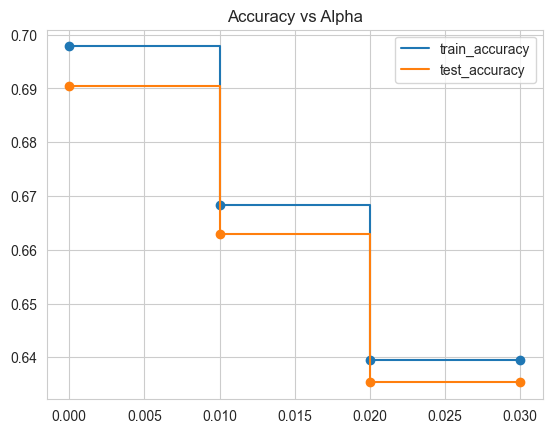

In [45]:
#For Entropy Tree GCV 
ccp_alphas2 = np.arange(0,0.037,0.01)
models = []
for ccp_alpha in ccp_alphas2:
    model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42, ccp_alpha=ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)
    
#Plotting the CCP alphas and their corresponding accuracy scores
train_acc = []
test_acc  = []
for m in models:
    y_train_pred = m.predict(x_train)
    y_test_pred = m.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas2,train_acc)
plt.scatter(ccp_alphas2,test_acc)
plt.plot(ccp_alphas2,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas2,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

In [46]:
#performing post pruning for every model 
# alpha = select
#selecting the alpha and trying out the accuracy and models

classifier = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42, ccp_alpha=0)
classifier.fit(x_train,y_train)

#Prediction for the testing dataset 
y_pred = classifier.predict(x_test)
#Prediction for the training dataset 
y_pred_train =  classifier.predict(x_train)

#Confusion matrix for calculation 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

#Calculatinf other scores for comparision 
#f1_score = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred)
#Precision= precision_score(y_test, y_pred)

print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE ",name," is :", EV)
print("___________________________")
#print("F-1 SCORE ",name," is :", f1_score)
#print("RECALL ",name," is :", Recall)
#print("PRECISION ",name," is :", Precision)

TEST ACCURACY  EntropyTree_BestGCV  is : 0.6904300658659435
TRAIN ACCURACY EntropyTree_BestGCV  is : 0.6978163400863501
EXPECTED VALUE  EntropyTree_BestGCV  is : 846130
___________________________


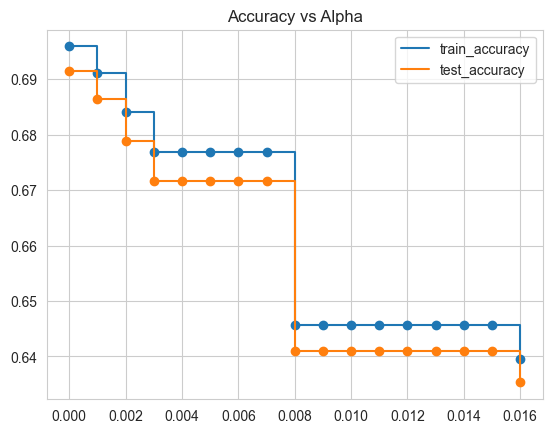

In [47]:
#Gini GCV model
ccp_alphas2 = np.arange(0,0.0167,0.001)
models = []
for ccp_alpha in ccp_alphas2:
    model = tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42, ccp_alpha=ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)
    
#Plotting the CCP alphas and their corresponding accuracy scores
train_acc = []
test_acc  = []
for m in models:
    y_train_pred = m.predict(x_train)
    y_test_pred = m.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas2,train_acc)
plt.scatter(ccp_alphas2,test_acc)
plt.plot(ccp_alphas2,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas2,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

In [48]:
#performing post pruning for every model 
# alpha = select
#selecting the alpha and trying out the accuracy and models

classifier = tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42, ccp_alpha=0)
classifier.fit(x_train,y_train)

#Prediction for the testing dataset 
y_pred = classifier.predict(x_test)
#Prediction for the training dataset 
y_pred_train =  classifier.predict(x_train)

#Confusion matrix for calculation 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

#Calculatinf other scores for comparision 
#f1_score = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred)
#Precision= precision_score(y_test, y_pred)

print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE ",name," is :", EV)
print("___________________________")
#print("F-1 SCORE ",name," is :", f1_score)
#print("RECALL ",name," is :", Recall)
#print("PRECISION ",name," is :", Precision)

TEST ACCURACY  EntropyTree_BestGCV  is : 0.6913986826811314
TRAIN ACCURACY EntropyTree_BestGCV  is : 0.6958859182995683
EXPECTED VALUE  EntropyTree_BestGCV  is : 835100
___________________________


Stratified sampling for all the models 

### Stratified Sampling

#### Stratified Sampling - Naive Bayes Models

In [49]:
#Creating stratified sample 

stratified_sample =  StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Empty list to maintain all the scores
scores = []

#For loops for all calculations 
for model_name,model in NB_models.items():
    for train_index, test_index in stratified_sample.split(x, y):
        # Split the data into training and test sets for this fold
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        Y_train, Y_test = y[train_index], y[test_index]

        # Train the classifier and make predictions
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)

        # Calculate and store the accuracy for this fold
        score = accuracy_score(Y_test, predictions)
        scores.append(score)
    # Print the accuracy for each fold
    for cnt, score in enumerate(scores, 1):
        print(f'Fold {cnt}: Accuracy: {score:.4f}')
    print("Average Score for", model_name, "is", np.mean(scores))

Fold 1: Accuracy: 0.5506
Fold 2: Accuracy: 0.5518
Fold 3: Accuracy: 0.5489
Fold 4: Accuracy: 0.5524
Fold 5: Accuracy: 0.5616
Fold 6: Accuracy: 0.5509
Fold 7: Accuracy: 0.5494
Fold 8: Accuracy: 0.5464
Fold 9: Accuracy: 0.5573
Fold 10: Accuracy: 0.5500
Average Score for MultinomialNB is 0.5519150873256126
Fold 1: Accuracy: 0.5506
Fold 2: Accuracy: 0.5518
Fold 3: Accuracy: 0.5489
Fold 4: Accuracy: 0.5524
Fold 5: Accuracy: 0.5616
Fold 6: Accuracy: 0.5509
Fold 7: Accuracy: 0.5494
Fold 8: Accuracy: 0.5464
Fold 9: Accuracy: 0.5573
Fold 10: Accuracy: 0.5500
Fold 11: Accuracy: 0.6433
Fold 12: Accuracy: 0.6459
Fold 13: Accuracy: 0.6350
Fold 14: Accuracy: 0.6404
Fold 15: Accuracy: 0.6423
Fold 16: Accuracy: 0.6553
Fold 17: Accuracy: 0.6479
Fold 18: Accuracy: 0.6375
Fold 19: Accuracy: 0.6437
Fold 20: Accuracy: 0.6443
Average Score for GaussianNB is 0.5977421649597838
Fold 1: Accuracy: 0.5506
Fold 2: Accuracy: 0.5518
Fold 3: Accuracy: 0.5489
Fold 4: Accuracy: 0.5524
Fold 5: Accuracy: 0.5616
Fold 6: 

#### Stratified Sampling - Tree Models

In [50]:
#For loops for all calculations 
for model_name,model in Tree_models_42.items():
    for train_index, test_index in stratified_sample.split(x, y):
        # Split the data into training and test sets for this fold
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        Y_train, Y_test = y[train_index], y[test_index]

        # Train the classifier and make predictions
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)

        # Calculate and store the accuracy for this fold
        score = accuracy_score(Y_test, predictions)
        scores.append(score)
    # Print the accuracy for each fold
    for cnt, score in enumerate(scores, 1):
        print(f'Fold {cnt}: Accuracy: {score:.4f}')
    print("Average Score for", model_name, "is", np.mean(scores))

Fold 1: Accuracy: 0.5506
Fold 2: Accuracy: 0.5518
Fold 3: Accuracy: 0.5489
Fold 4: Accuracy: 0.5524
Fold 5: Accuracy: 0.5616
Fold 6: Accuracy: 0.5509
Fold 7: Accuracy: 0.5494
Fold 8: Accuracy: 0.5464
Fold 9: Accuracy: 0.5573
Fold 10: Accuracy: 0.5500
Fold 11: Accuracy: 0.6433
Fold 12: Accuracy: 0.6459
Fold 13: Accuracy: 0.6350
Fold 14: Accuracy: 0.6404
Fold 15: Accuracy: 0.6423
Fold 16: Accuracy: 0.6553
Fold 17: Accuracy: 0.6479
Fold 18: Accuracy: 0.6375
Fold 19: Accuracy: 0.6437
Fold 20: Accuracy: 0.6443
Fold 21: Accuracy: 0.5506
Fold 22: Accuracy: 0.5515
Fold 23: Accuracy: 0.5485
Fold 24: Accuracy: 0.5522
Fold 25: Accuracy: 0.5615
Fold 26: Accuracy: 0.5504
Fold 27: Accuracy: 0.5491
Fold 28: Accuracy: 0.5462
Fold 29: Accuracy: 0.5565
Fold 30: Accuracy: 0.5495
Fold 31: Accuracy: 0.6382
Fold 32: Accuracy: 0.6382
Fold 33: Accuracy: 0.6382
Fold 34: Accuracy: 0.6382
Fold 35: Accuracy: 0.6383
Fold 36: Accuracy: 0.6383
Fold 37: Accuracy: 0.6383
Fold 38: Accuracy: 0.6383
Fold 39: Accuracy: 0.

### Ensemble Learning 

Ensemble learning 
* Simple averaging 
* Boosting 
* Bagging 

#### Simple Averaging

In [51]:
x_train.shape

(48176, 14)

In [52]:
y_train.shape

(48176,)

In [53]:
models_dict = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42),
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}

for name, classifier in models_dict.items():
    #fit the model 
    classifier.fit(x_train, y_train)
    #make prediciton 
    #Calculating all the predicitons 
    y_pred = classifier.predict(x_test)
    y_pred_train =  classifier.predict(x_train)
    
    #confusion matrix 
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)

TEST ACCURACY  GiniTree_NoEstimators  is : 0.6499903138318481
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9993357688475589
EXPECTED VALUE  GiniTree_NoEstimators  is : 232910
TEST ACCURACY  EntropyTree_NoEstimators  is : 0.6546881053855095
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9993357688475589
EXPECTED VALUE  EntropyTree_NoEstimators  is : 226570
TEST ACCURACY  ExtraTrees_Gini  is : 0.6948372723750484
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9993357688475589
EXPECTED VALUE  ExtraTrees_Gini  is : 556440
TEST ACCURACY  ExtraTrees_Entropy  is : 0.6956605966679582
TRAIN ACCURACY ExtraTrees_Entropy  is : 0.9993357688475589
EXPECTED VALUE  ExtraTrees_Entropy  is : 559930
TEST ACCURACY  MultinomialNB  is : 0.5509976753196435
TRAIN ACCURACY MultinomialNB  is : 0.5527441049485221
EXPECTED VALUE  MultinomialNB  is : 65310
TEST ACCURACY  GaussianNB  is : 0.6439364587369236
TRAIN ACCURACY GaussianNB  is : 0.6443664895383594
EXPECTED VALUE  GaussianNB  is : 621190
TEST ACCURACY  ComplementN

In [54]:
#HARD VOTING
models_dict_2 = [('GiniTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='gini', random_state=42)), 
                 ('EntropyTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='entropy', random_state=42)),
                 ('ExtraTrees_Gini', ExtraTreesClassifier( criterion='gini', random_state=42)), 
                 ('ExtraTrees_Entropy', ExtraTreesClassifier( criterion='entropy', random_state=42)),
                 ('MultinomialNB', MultinomialNB()),
                 ('GaussianNB', GaussianNB()),
                 ('ComplementNB', ComplementNB()),
                 ('BernoulliNB', BernoulliNB())]


model = VotingClassifier(estimators=[('GiniTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='gini', random_state=42)), 
                 ('EntropyTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='entropy', random_state=42)),
                 ('ExtraTrees_Gini', ExtraTreesClassifier( criterion='gini', random_state=42)), 
                 ('ExtraTrees_Entropy', ExtraTreesClassifier( criterion='entropy', random_state=42)),
                 ('MultinomialNB', MultinomialNB()),
                 ('GaussianNB', GaussianNB()),
                 ('ComplementNB', ComplementNB()),
                 ('BernoulliNB', BernoulliNB())], voting='hard')
#Fitting the model 
model.fit(x_train,y_train)
#Calculating all the predicitons 
y_pred = model.predict(x_test)
y_pred_train =  model.predict(x_train)

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

print("Train accuracy: ",accuracy_score(y_train, y_pred_train))
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Expected Value: ", EV)

Train accuracy:  0.8653894055131186
Test accuracy:  0.6815187911662146
Expected Value:  812120


In [55]:
#SOFT VOTING
model = VotingClassifier(estimators=models_dict_2, voting='soft')
#Fitting the model 
model.fit(x_train,y_train)
#Calculating all the predicitons 
y_pred = model.predict(x_test)
y_pred_train =  model.predict(x_train)

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

print("Train accuracy: ",accuracy_score(y_train, y_pred_train))
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Expected Value: ", EV)


Train accuracy:  0.9993357688475589
Test accuracy:  0.6718810538550949
Expected Value:  453270


#### Bagging

/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  MultinomialNB  is : 0.5509492444788842
TRAIN ACCURACY MultinomialNB  is : 0.5526195616074394
EXPECTED VALUE  MultinomialNB  is : 64930
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  GaussianNB  is : 0.6440333204184424
TRAIN ACCURACY GaussianNB  is : 0.6443457323148456
EXPECTED VALUE  GaussianNB  is : 620870
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  ComplementNB  is : 0.550561797752809
TRAIN ACCURACY ComplementNB  is : 0.5523289604782464
EXPECTED VALUE  ComplementNB  is : 62700
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  BernoulliNB  is : 0.6353157690817512
TRAIN ACCURACY BernoulliNB  is : 0.639530056459648
EXPECTED VALUE  BernoulliNB  is : 1260680
___________________________
Train accuracy of RandomForest algo:  0.9993150116240451
Test accuracy of RandomForest algo:  0.7202634637737311
Expected Value of RandomForest algo:  505380


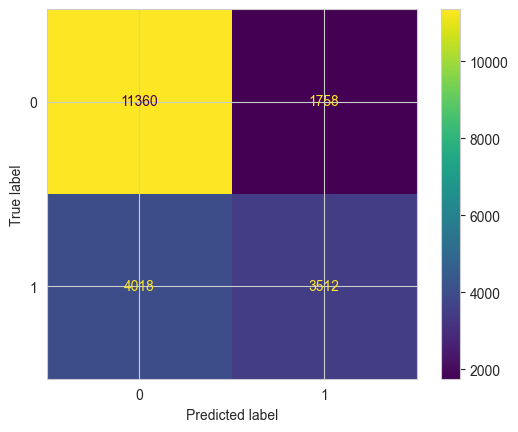

In [59]:
#### Bagging for Naives Bayes models 

from sklearn.ensemble import BaggingClassifier

for name, classifier in NB_models.items():
    
    model = BaggingClassifier(base_estimator=classifier, n_estimators=100, random_state=42)
    
    #fit the model to our data 
    model.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = model.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  model.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)



# Bagging with Random Forest Classifier 
# Build a Gaussian Classifier
modelMNB = RandomForestClassifier()
modelMNB.fit(x_train, y_train)

#Calculating all the predicitons 
y_pred = modelMNB.predict(x_test)
y_pred_train =  modelMNB.predict(x_train)

#Calculating accuracy 
mnb_train_accuracy = accuracy_score(y_train, modelMNB.predict(x_train))
mnb_test_accuracy = accuracy_score(y_test, modelMNB.predict(x_test))

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV_MNB = np.sum(cm * cost_matrix)

print("Train accuracy of RandomForest algo: ", mnb_train_accuracy)
print("Test accuracy of RandomForest algo: ", mnb_test_accuracy)
print("Expected Value of RandomForest algo: ", EV_MNB)



#### Boosting

In [60]:
#Adaboost for all our models 
from sklearn.ensemble import AdaBoostClassifier

for name, classifier in models_dict.items():
    
    model = AdaBoostClassifier(base_estimator=classifier, n_estimators=100, random_state=42)
    
    #fit the model to our data 
    model.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = model.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  model.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  GiniTree_NoEstimators  is : 0.6694595118171252
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9993357688475589
EXPECTED VALUE  GiniTree_NoEstimators  is : 567920
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  EntropyTree_NoEstimators  is : 0.6969197985277025
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9993357688475589
EXPECTED VALUE  EntropyTree_NoEstimators  is : 386750
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
#XGBoost 
import xgboost as xgb

# Build a Gaussian Classifier
modelXG = xgb.XGBClassifier(n_estimators=100, max_depth=10, random_state=42, 
                                 booster='gbtree', subsample=0.8, colsample_bytree=0.8)
modelXG.fit(x_train, y_train)

#Calculating all the predicitons 
y_pred = modelXG.predict(x_test)
y_pred_train =  modelXG.predict(x_train)

#Calculating accuracy 
mnb_train_accuracy = accuracy_score(y_train, modelXG.predict(x_train))
mnb_test_accuracy = accuracy_score(y_test, modelXG.predict(x_test))

#Confusion matrix 
labels = [0,1,2,3,4,5]
classes = [0,1,2,3,4,5]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV_MNB = np.sum(cm * cost_matrix)

print("Train accuracy of XGBoost algo: ", mnb_train_accuracy)
print("Test accuracy of XGBoost algo: ", mnb_test_accuracy)
print("Expected Value of XGBoost algo: ", EV_MNB)


## Feature Selection - Data analysis Part 2

Further improve accuracy by first feature selection - keeping only relevant features 
* For NB methods - simple + stratified 
* For tree methods - simple, pre-prune, post prune
* Ensemble - simple, boosting, bagging

In [ ]:
a

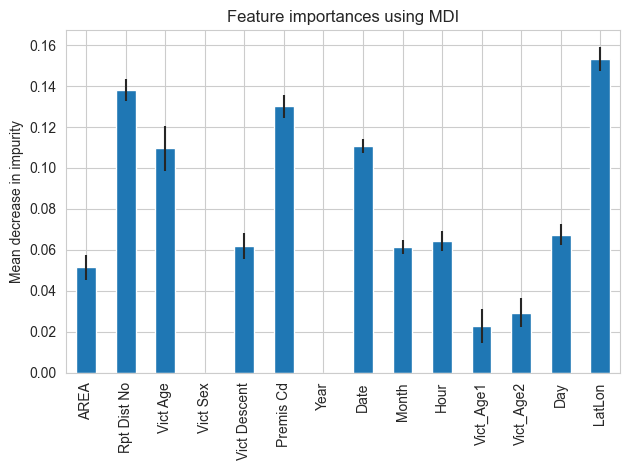

In [61]:
#Selecting features part 1 - using feature importances

# storing the feature names in a list
feature_names_from_dataset = df.columns.drop('Crime_Category').tolist()
feature_names_from_dataset

#rf model 
rf_model= RandomForestClassifier(n_estimators = 100)
rf_model.fit(x_train, y_train)

#Calculating importance of all features and plotting them
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
forest_importances = pd.Series(importances, index = feature_names_from_dataset)
# print(forest_importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

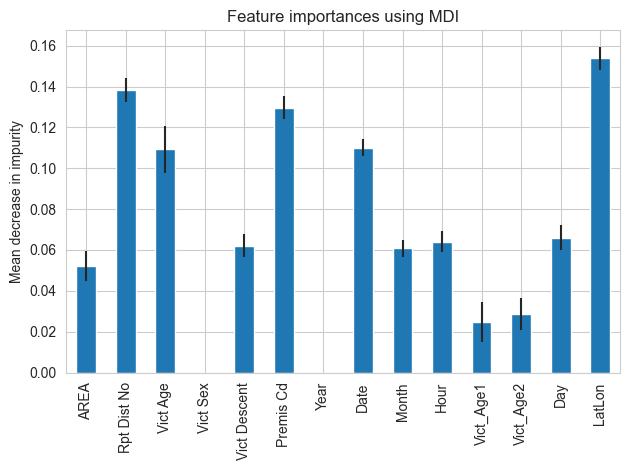

In [62]:

# storing the feature names in a list
feature_names_from_dataset = df.columns.drop('Crime_Category').tolist()
feature_names_from_dataset

#rf model 
rf_model= RandomForestClassifier(n_estimators = 300)
rf_model.fit(x_train, y_train)

#Calculating importance of all features and plotting them
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
forest_importances = pd.Series(importances, index = feature_names_from_dataset)
# print(forest_importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

['Rpt Dist No', 'Vict Age', 'Vict Descent', 'Premis Cd', 'Date', 'Month', 'Hour', 'Day', 'LatLon']

In [ ]:
x_train.columns



Index(['AREA', 'Rpt Dist No', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Premis Cd', 'Year', 'Date', 'Month', 'Hour', 'Vict_Age1', 'Vict_Age2',
       'Day', 'LatLon'],
      dtype='object')

Guassian NB gave highest accuracy, so we will do feature selection according to it. 

In [63]:
from sklearn.feature_selection import SequentialFeatureSelector


sfs = SequentialFeatureSelector(modelGB, n_features_to_select=3, direction=”forward”)
sfs.fit(x_train, y_train)
X_selection = sfs.transform(X)

SyntaxError: invalid character in identifier (357937456.py, line 4)

In [64]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
modelGB= GaussianNB()

modelGB_forward=sfs(modelGB,n_features_to_select=10, direction="forward")
modelGB_forward.fit(x_train,y_train)

# Get the column names for the selected features
selected_features = modelGB_forward.get_feature_names_out()
print(selected_features)

#modelGB_forward_r2=sfs(modelGB,n_features_to_select=8, direction="forward",scoring='callable')
#modelGB_forward_r1.fit(x_train,y_train)
#Get the column name for the selected feature.
#modelGB_forward_r1.k_feature_names_


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * 

['AREA' 'Rpt Dist No' 'Vict Sex' 'Vict Descent' 'Year' 'Date' 'Month'
 'Hour' 'Vict_Age1' 'Day']


In [65]:
modelGB_back=sfs(modelGB,n_features_to_select=10, direction="backward")
modelGB_back.fit(x_train,y_train)

# Get the column names for the selected features
selected_features = modelGB_back.get_feature_names_out()
print(selected_features)

['AREA' 'Rpt Dist No' 'Vict Sex' 'Vict Descent' 'Year' 'Date' 'Month'
 'Hour' 'Vict_Age1' 'Day']


Based on this, we will trim our features and drop the remaining features. 

* For trees - ['Rpt Dist No', 'Vict Age', 'Vict Descent', 'Premis Cd', 'Date', 'Month', 'Hour', 'Day', 'LatLon']
* For NB models - 'AREA' 'Rpt Dist No' 'Vict Sex' 'Vict Descent' 'Year' 'Date' 'Month'
 'Hour' 'Vict_Age1' 'Day'

* Both -'Rpt Dist No' 'Vict Sex' 'Vict Descent' Date' 'Month' 'Hour' 'Vict_Age1' 'Day' 'LatLon'

In [ ]:
df.head(5)

,AREA,Rpt Dist No,Vict Age,Vict Sex,Vict Descent,Premis Cd,Crime_Category,Year,Date,Month,Hour,Vict_Age1,Vict_Age2,Day,LatLon
0,3,377,36,0,1,501,1,2020,8,1,6,3,3,3,13212
1,1,163,25,0,3,102,1,2020,1,1,1,2,1,3,20466
2,12,1259,62,0,1,502,0,2020,16,9,3,4,5,3,7239
3,15,1543,76,0,2,502,0,2020,1,1,5,5,5,3,36772
4,19,1998,31,0,4,409,0,2020,1,1,1,3,2,3,43900


In [78]:
df_trim_2021 = df [['Rpt Dist No' ,'Vict Sex', 'Vict Descent', 'Date', 'Month', 'Hour' ,'Vict_Age1', 'Day' ,'LatLon', 'Crime_Category']]

In [79]:
df_trim_2021['Crime_Category'].value_counts()

Crime_Category
0    43928
1    24896
Name: count, dtype: int64

In [80]:
df_trim_2021.to_csv('df_trim_2021.csv', index=False)